In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="talk", style="darkgrid", font="MS GOTHIC")

In [31]:
df = pd.read_csv("./data/CrabAgePrediction.csv")

In [32]:
df.head(10)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
5,F,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,5.854172,4.819415,15
7,M,1.3250,1.0125,0.3750,23.572609,9.979024,5.301356,7.158249,10
8,I,1.5875,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13
9,I,0.9125,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [34]:
for feature in df.columns:
    print(f"{feature} : ({df[feature].nunique()}) {df[feature].unique()[:5]}")
    print("=============================================")

Sex : (3) ['F' 'M' 'I']
Length : (134) [1.4375 0.8875 1.0375 1.175  1.55  ]
Diameter : (111) [1.175  0.65   0.775  0.8875 0.6625]
Height : (51) [0.4125 0.2125 0.25   0.35   0.325 ]
Weight : (2343) [24.6357155   5.40057975  7.95203475 13.48018725  6.90310325]
Shucked Weight : (1482) [12.3320325   2.2963095   3.231843    4.74854125  3.458639  ]
Viscera Weight : (867) [5.5848515  1.37495075 1.60174675 2.28213475 1.48834875]
Shell Weight : (907) [6.747181   1.5592225  2.76407625 5.2446575  1.70097   ]
Age : (28) [ 9  6 10  8 15]


In [35]:
cat_feature = df.select_dtypes("object").columns.values
num_feature = df.select_dtypes(exclude=["object"]).columns.values

categorical feature

In [36]:
df["Sex"].value_counts()

M    1435
I    1233
F    1225
Name: Sex, dtype: int64

numerical feature

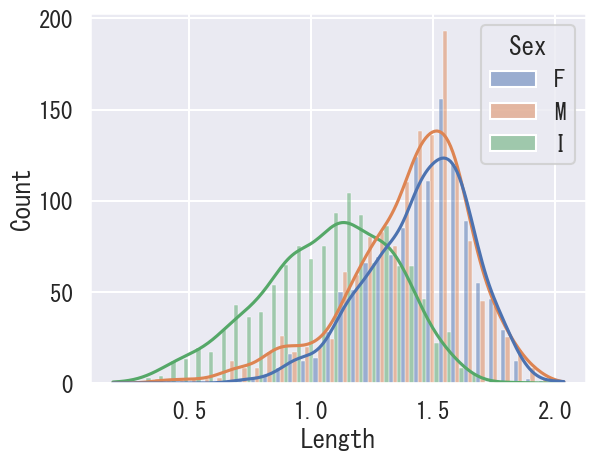

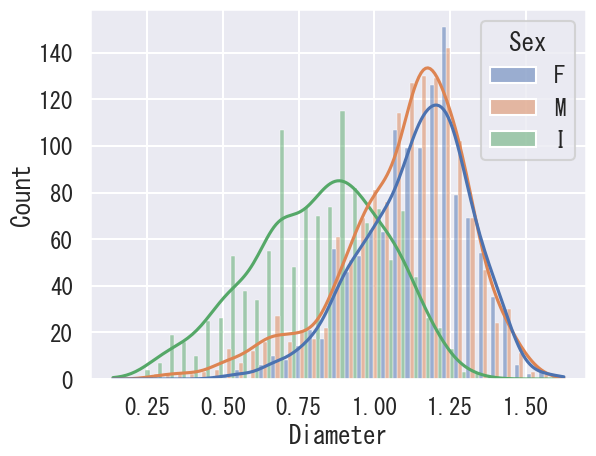

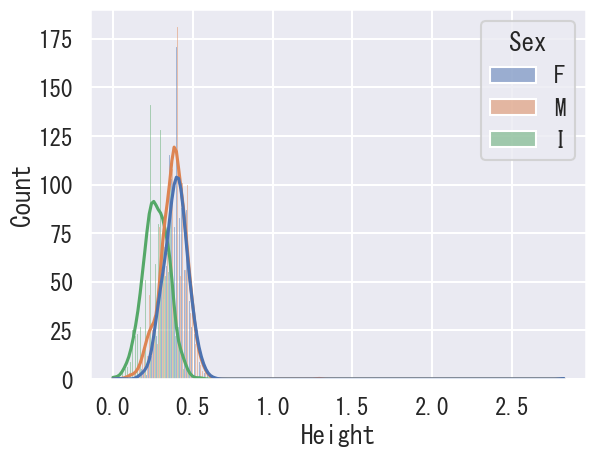

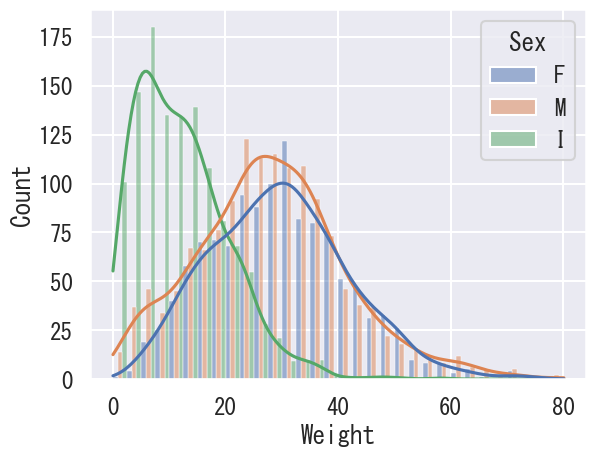

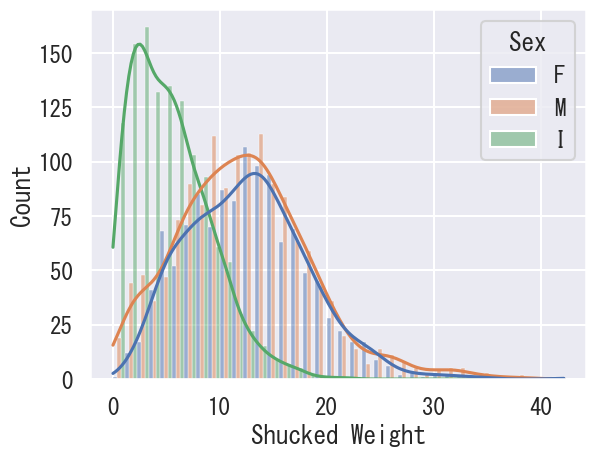

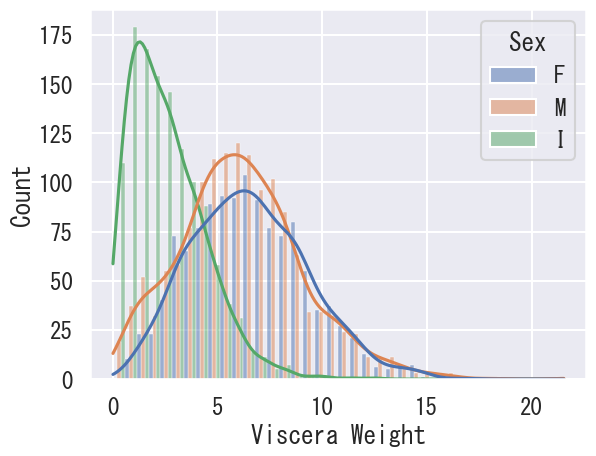

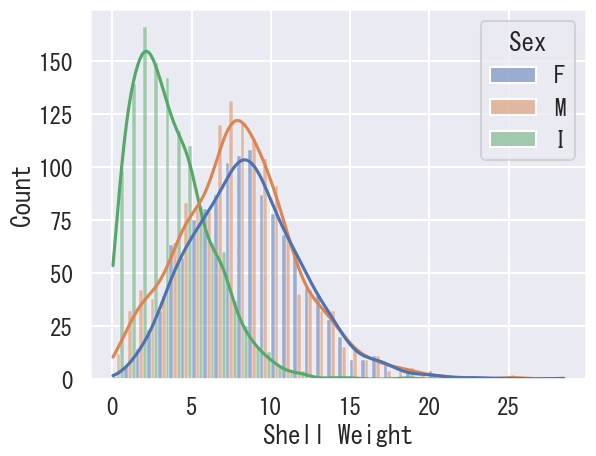

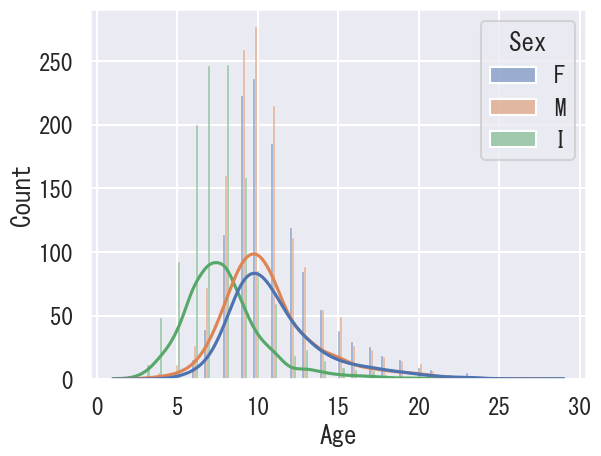

In [37]:
for num in num_feature:
    sns.histplot(data=df, x=df[num], hue="Sex", multiple="dodge", kde=True)
    plt.show()

In [38]:
df["Height"].describe()

count    3893.000000
mean        0.349374
std         0.104976
min         0.000000
25%         0.287500
50%         0.362500
75%         0.412500
max         2.825000
Name: Height, dtype: float64

In [39]:
df["Height"].nlargest(5)

2256    2.8250
748     1.2875
772     0.6250
1485    0.6250
2588    0.6250
Name: Height, dtype: float64

In [40]:
df.drop(index=[2256, 748], inplace=True)

In [41]:
df["Height"].nlargest(5)


772     0.625
1485    0.625
2588    0.625
776     0.600
1949    0.600
Name: Height, dtype: float64

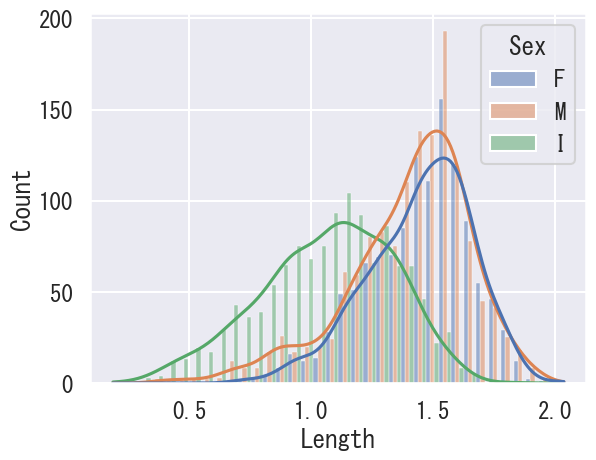

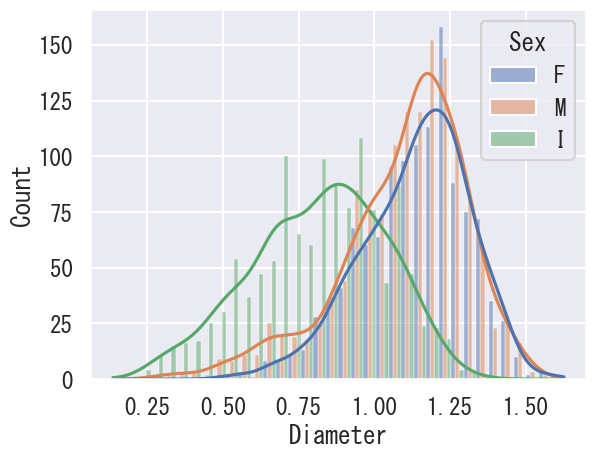

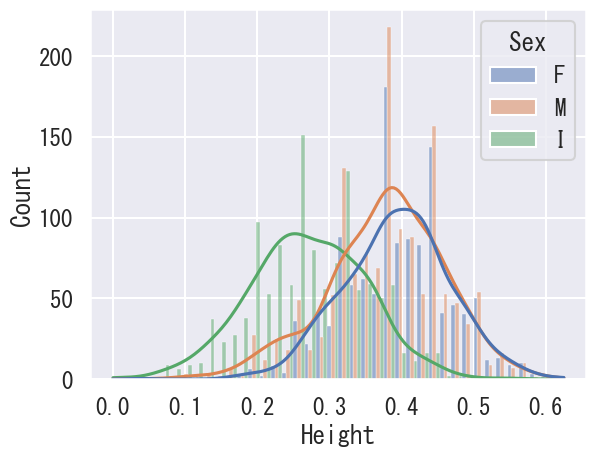

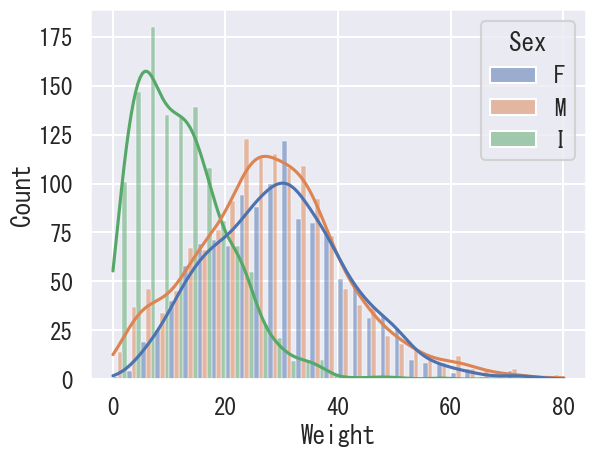

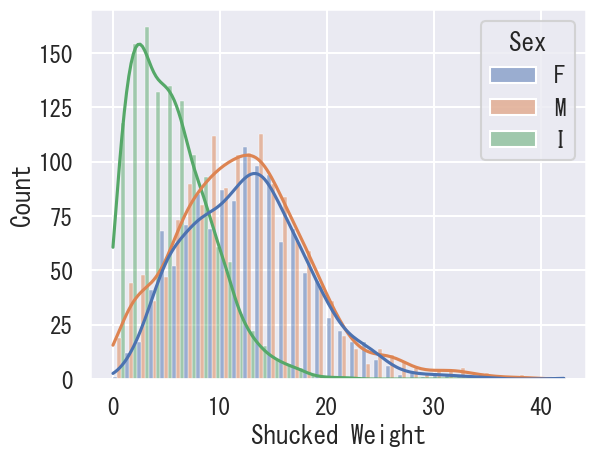

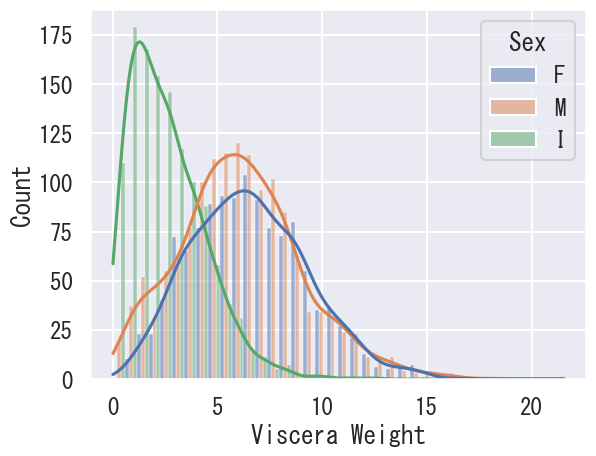

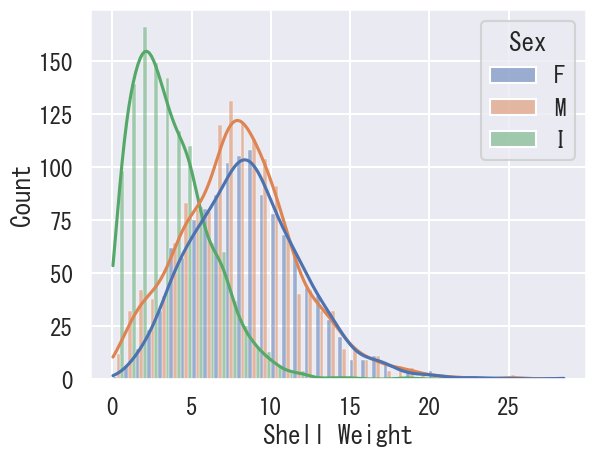

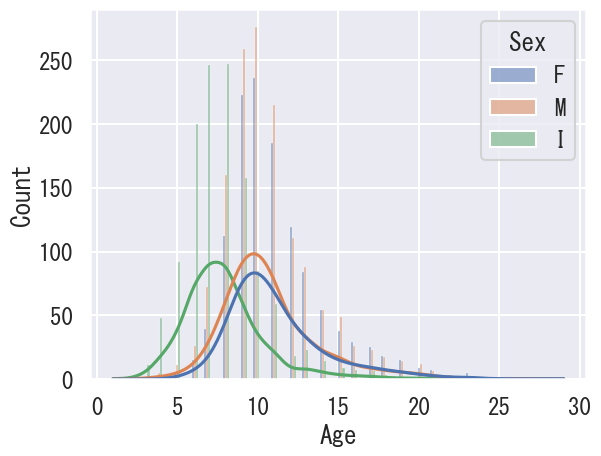

In [42]:
for num in num_feature:
    sns.histplot(data=df, x=df[num], hue="Sex", multiple="dodge", kde=True)
    plt.show()

<Figure size 1200x600 with 0 Axes>

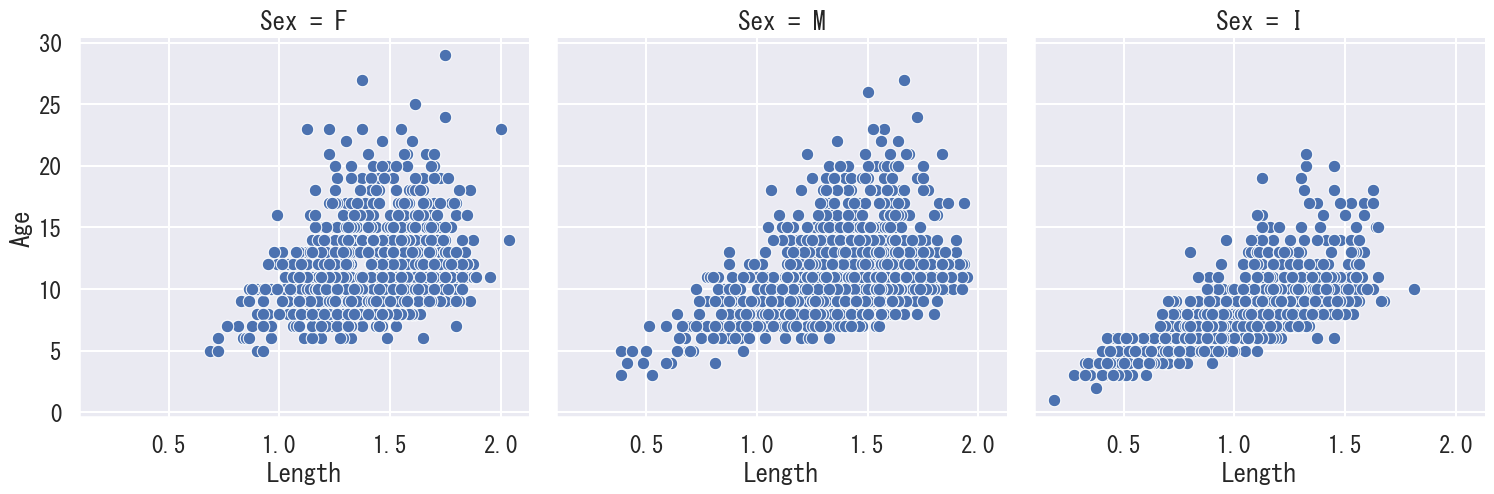

<Figure size 1200x600 with 0 Axes>

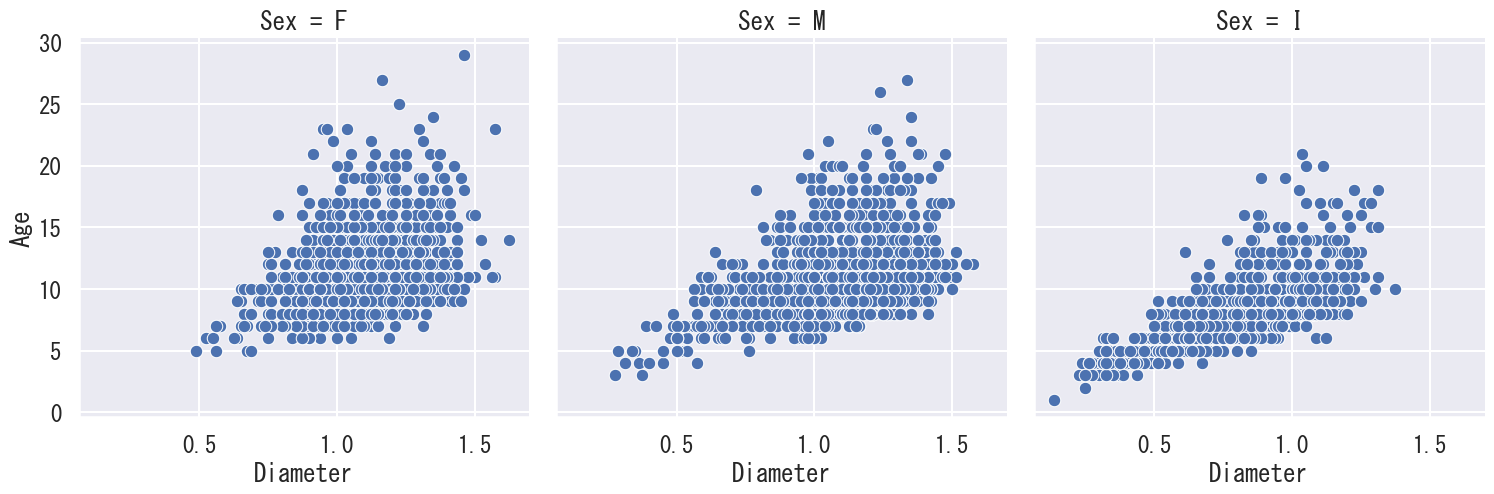

<Figure size 1200x600 with 0 Axes>

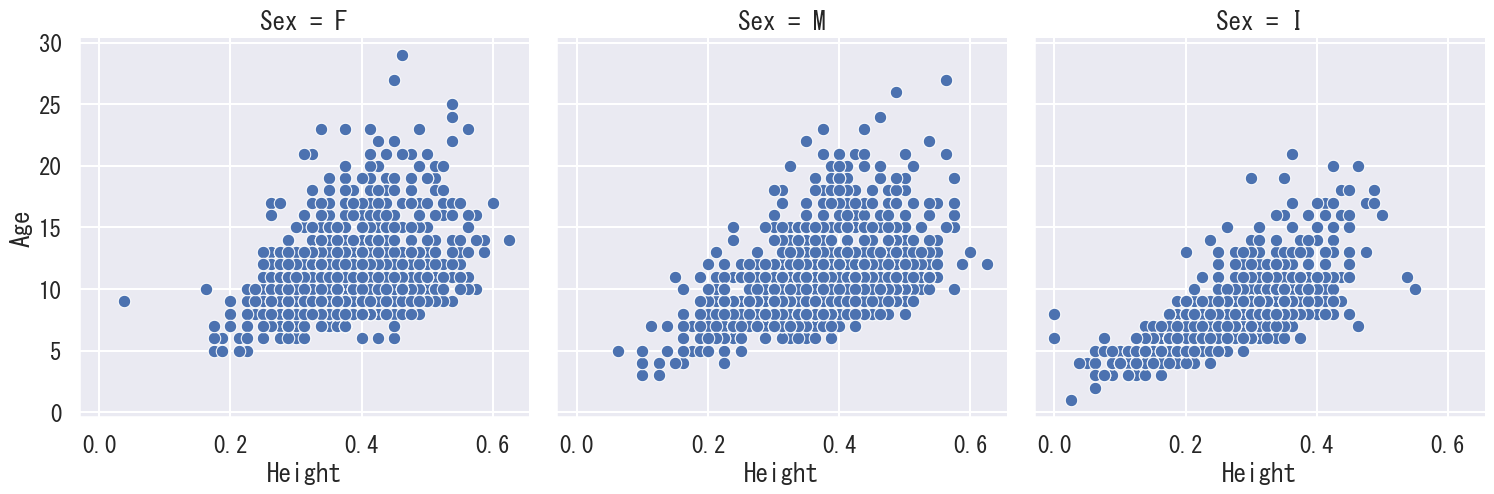

<Figure size 1200x600 with 0 Axes>

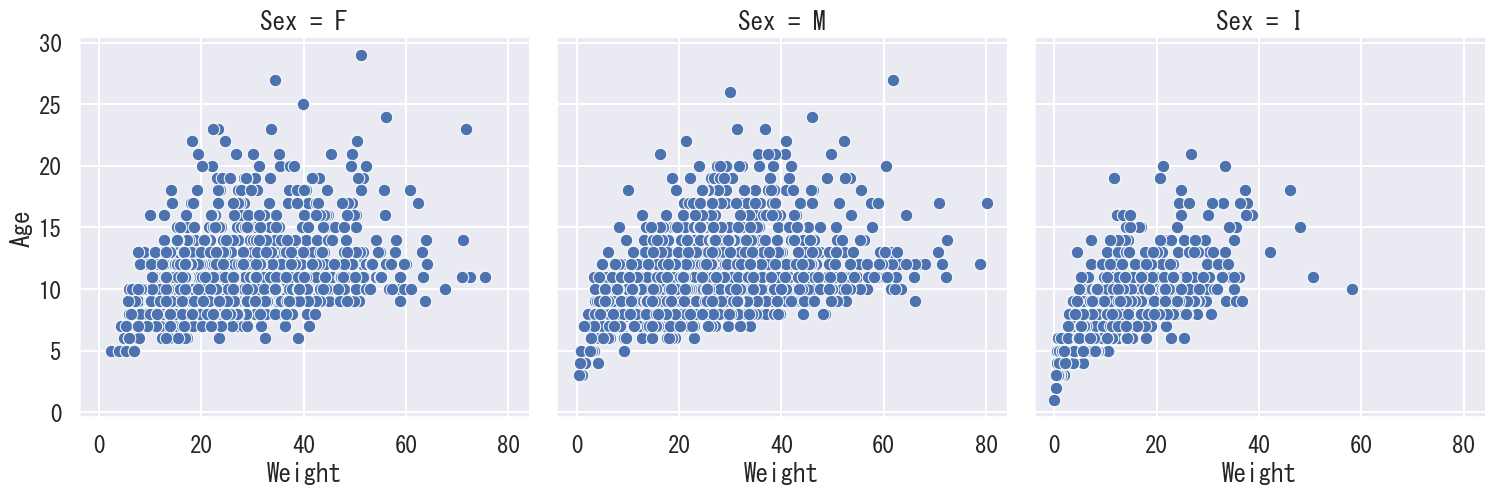

<Figure size 1200x600 with 0 Axes>

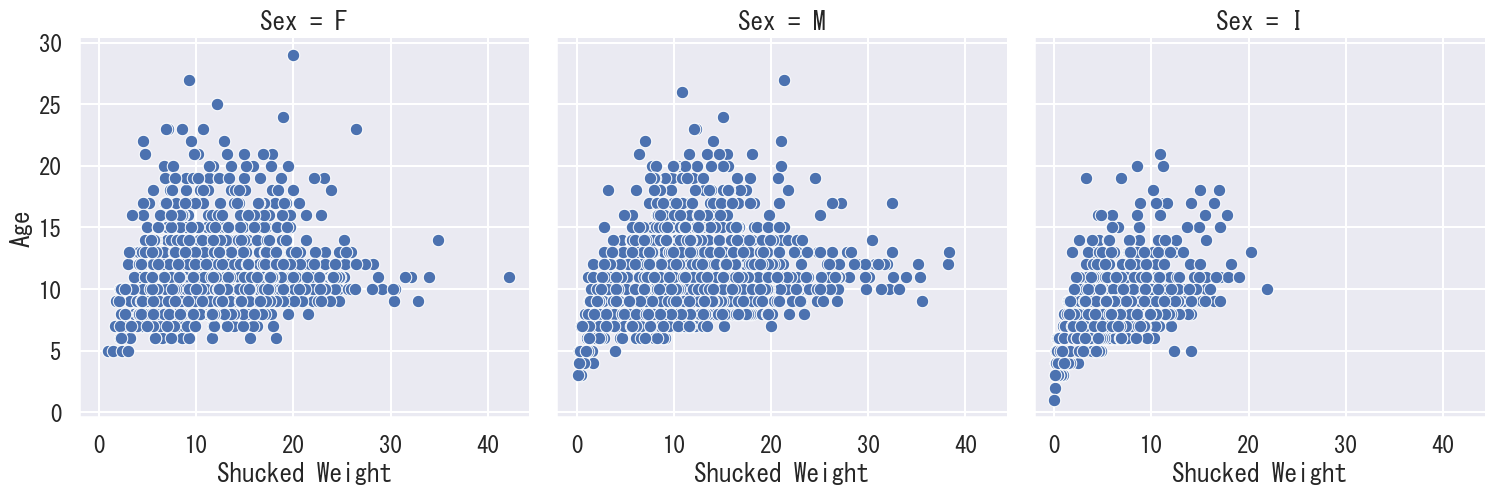

<Figure size 1200x600 with 0 Axes>

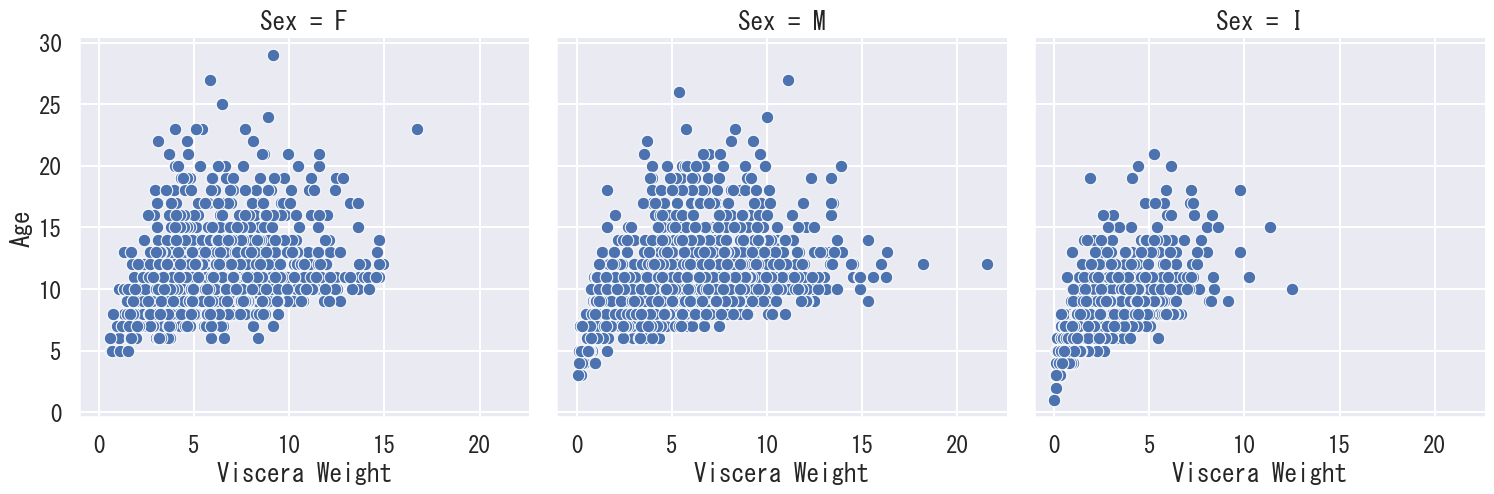

<Figure size 1200x600 with 0 Axes>

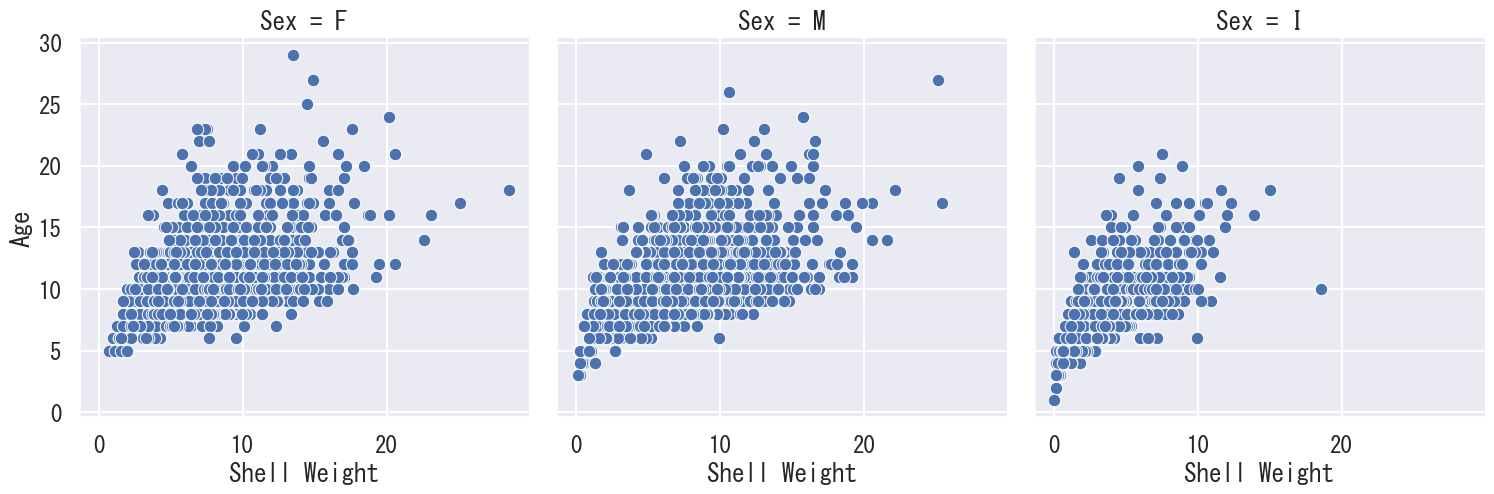

<Figure size 1200x600 with 0 Axes>

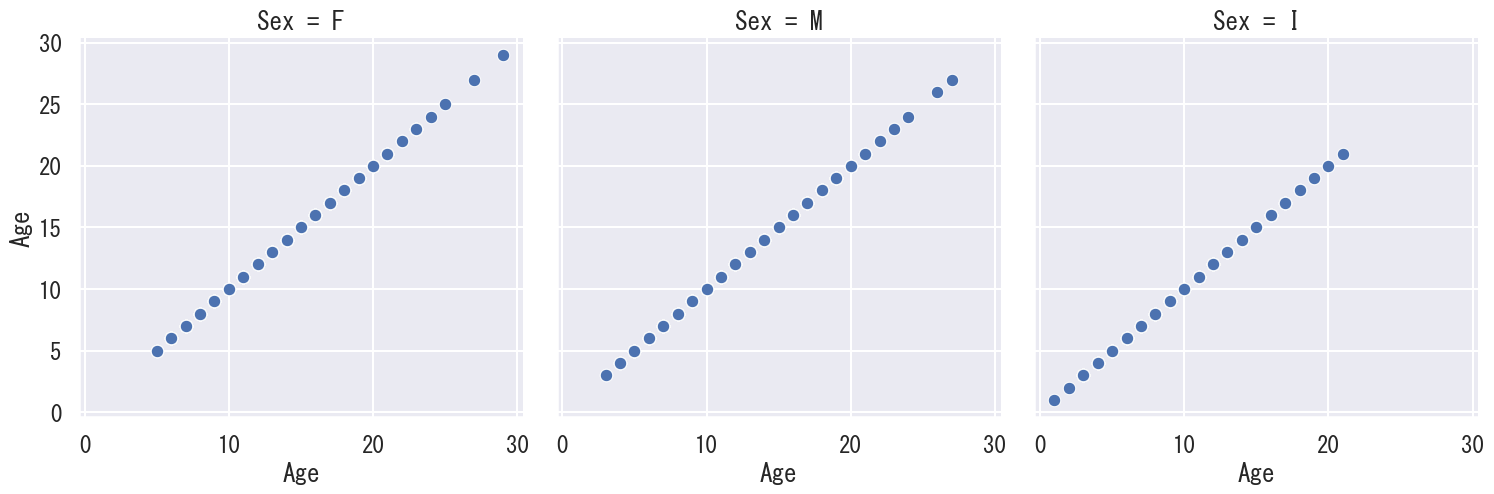

In [46]:
for num in num_feature:
    plt.figure(figsize=(12, 6))
    sns.relplot(data=df, x=num, y="Age", col="Sex")
    plt.show()

<AxesSubplot:>

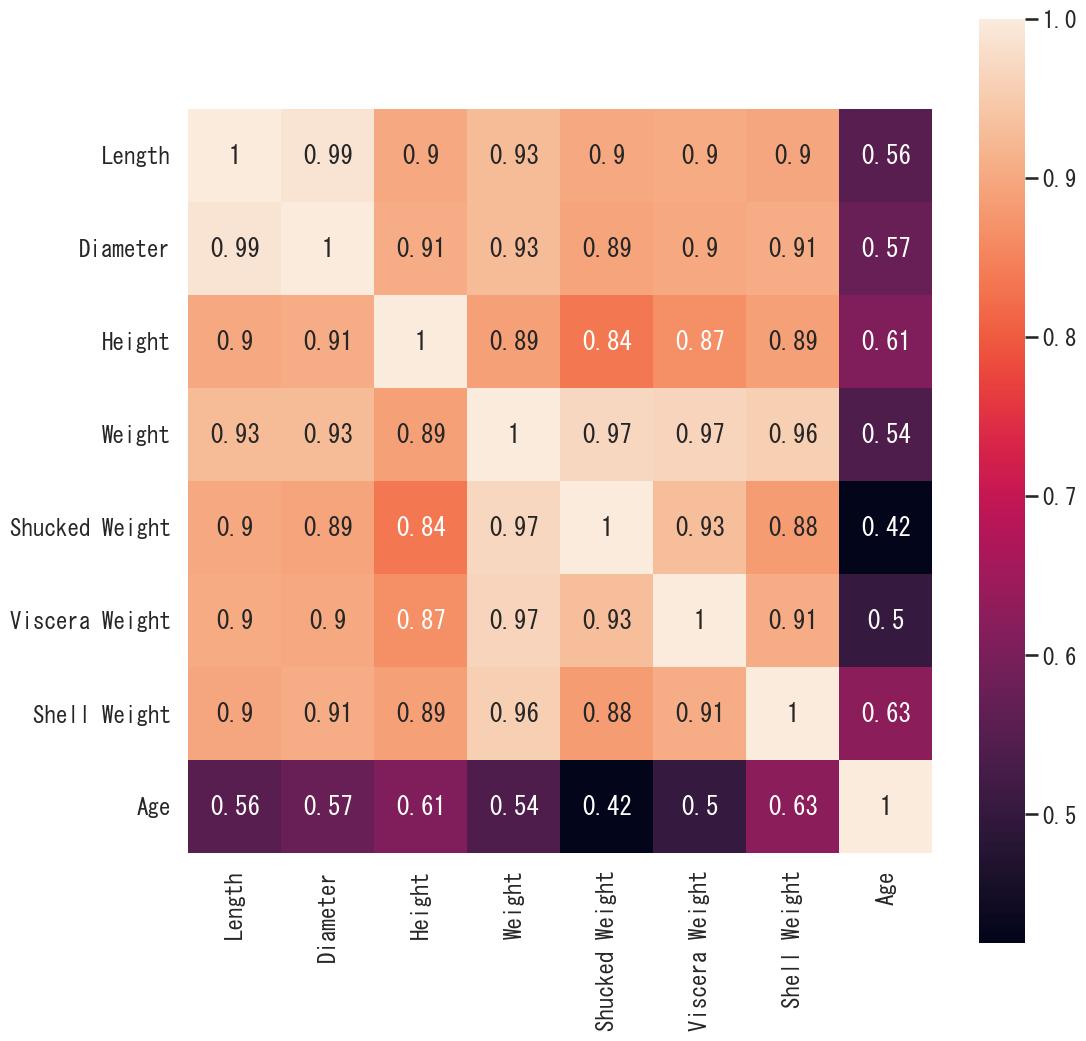

In [48]:
plt.figure(figsize=(12, 12))
sns.heatmap(df[num_feature].corr(), annot=True, square=True)

preprocessing

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer

In [73]:
df_X = df.iloc[:, :-1]
df_y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=17, test_size=0.2)

In [74]:
enc = OneHotEncoder(drop="first")
X_train_cat = enc.fit_transform(X_train[["Sex"]])
X_test_cat = enc.transform(X_test[["Sex"]])

In [75]:
tf = QuantileTransformer(output_distribution="normal")
X_train_num = tf.fit_transform(X_train.iloc[:, 1:])
X_test_num = tf.transform(X_test.iloc[:, 1:])

In [76]:
X_train_cat.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [77]:
X_train_num

array([[-0.38167465, -0.45008015, -0.67370246, ..., -0.41153446,
        -0.59843525, -0.54961629],
       [-1.14489597, -1.25574287, -1.33712701, ..., -1.21537205,
        -1.36845029, -1.22594275],
       [-2.16969406, -2.25674483, -2.08535557, ..., -2.31258051,
        -2.25674483, -2.27305239],
       ...,
       [ 1.00413133,  0.93779777,  0.76807531, ...,  1.27530247,
         1.49033514,  0.85167519],
       [-0.77314015, -0.91467864, -0.86801634, ..., -0.7413876 ,
        -0.89203836, -0.76470967],
       [-1.07744551, -1.04224674, -0.4279759 , ..., -0.77483284,
        -0.89953386, -1.09327227]])

In [78]:
X_train = np.concatenate([X_train_cat.toarray(), X_train_num], axis=1)
X_test = np.concatenate([X_test_cat.toarray(), X_test_num], axis=1)

model, training

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [80]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=17)

In [81]:
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [82]:
lr_model.score(X_test, y_test)
rf_model.score(X_test, y_test)

0.5407041443361359

In [114]:
pred = rf_model.predict(X_test)

In [118]:
pred = pred.astype(int)

evaluate

In [94]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [120]:
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)

In [121]:
mae, mape

(1.4646983311938382, 0.14535041040126148)

In [122]:
result = pd.DataFrame(np.concatenate([y_test.values.reshape(-1, 1), pred.reshape(-1, 1)], axis=1), columns=["True", "Prediction"])

In [123]:
result.sort_values("True", inplace=True, ignore_index=True)

In [124]:
result

,True,Prediction
0,3,4
1,3,4
2,3,3
3,3,3
4,4,3
...,...,...
774,21,14
775,21,14
776,21,13
777,22,14


([<matplotlib.axis.YTick at 0x29c82b490d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

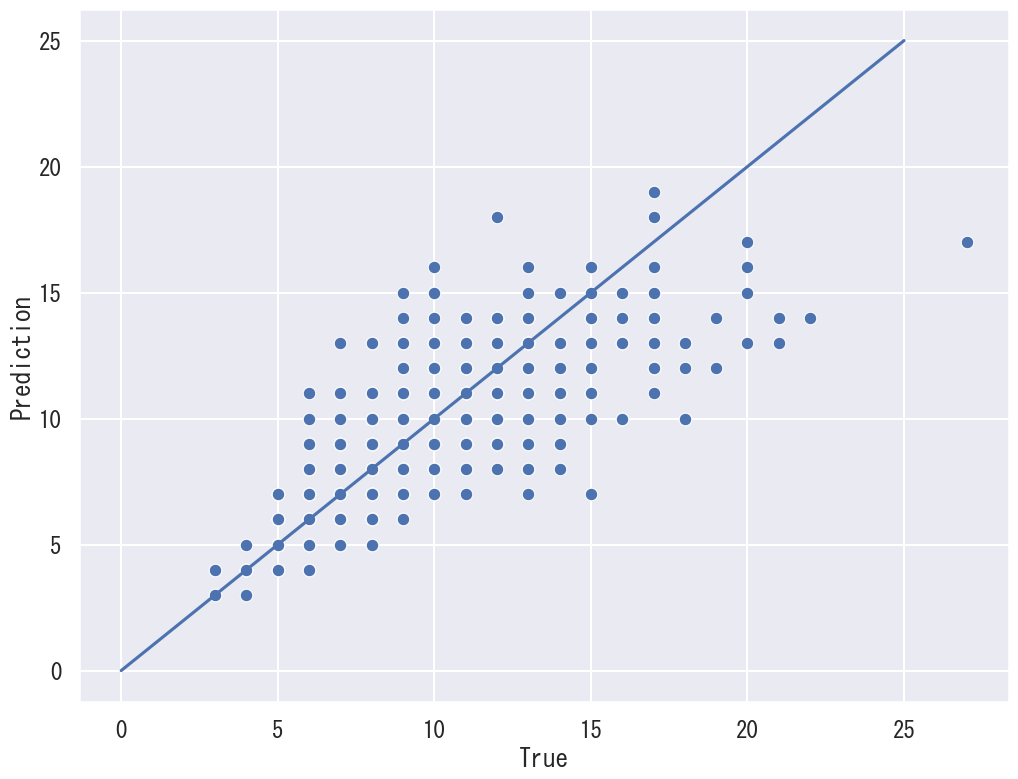

In [125]:
plt.figure(figsize=(12, 9))
sns.lineplot(x=np.arange(0, 30, 5), y=np.arange(0, 30, 5))
sns.scatterplot(data=result, x="True", y="Prediction", )
plt.xticks(np.arange(0, 30, 5))
plt.yticks(np.arange(0, 30, 5))